# ЛР №1 Проведение исследований с алгоритмом KNN.
Для классификации был выбрал датасет '[Mushroom Dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset)' \
Задачей было классифицировать съедобные и несъедобные грибы  \
Для регрессии был выбран датасет '[Gold Price Regression](https://www.kaggle.com/datasets/franciscogcc/financial-data)'\
Задачей было предсказывать стоимость золота.

# Классификация
Сначала рассмотрим задачу классификации

Загружаем датасет и смотрим его верхние строки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

file_path = "mushroom_cleaned.csv"
data = pd.read_csv(file_path)
data.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Посмотрим на распределение LoanApproved в датасете:

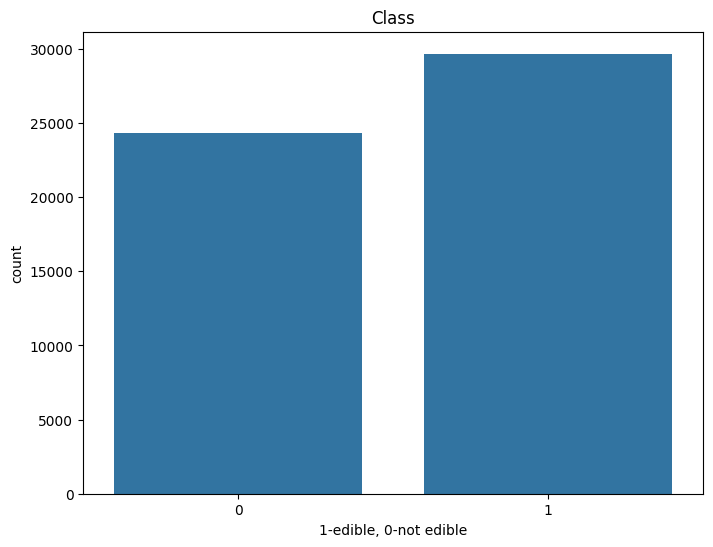

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Class')
plt.xlabel('1-edible, 0-not edible')
plt.ylabel('count')
plt.show()

Кодируем категориальные фичи и разделим фичи на целевые и не целевые

In [3]:
encoded_data = pd.get_dummies(data, columns=["cap-shape", "gill-attachment", "gill-color", "stem-color"])

label_encoder = LabelEncoder()
for column in ["cap-shape", "gill-attachment", "gill-color", "stem-color"]:
    data[column] = label_encoder.fit_transform(data[column])

# разделение фич на целевую и не целевую
X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Обучение KNN. В качестве метрики качества будем использовать accuracy

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_report = classification_report(y_test, y_pred)

print("Accuracy:", baseline_accuracy)
print(baseline_report)


Accuracy: 0.9896363468122513
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



Получаем достаточно высокие значения accuracy - 0.9896363468122513. Для класса съедобности грибов (1.0) recall ниже, поэтому это можно улучшить. \
Гипотеза - попробуем подобрать оптимальное число соседей (neighbors) - от 1 до 21 - и обучим модель заново. Число разбиений в кросс-валидации - 5

In [5]:
#поиск оптималного числа соседей
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("best neighbors:", best_params)
print("best score:", best_score)

#обучим улучшенную модель, чтобы посмотреть, как улучшится или не улучшится accuracy
knn_optimized = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_optimized.fit(X_train, y_train)
y_pred_optimized = knn_optimized.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_report = classification_report(y_test, y_pred_optimized)

print("optimized accuracy:", optimized_accuracy)
print(optimized_report)


best neighbors: {'n_neighbors': 5}
best score: 0.9871379189981038
optimized accuracy: 0.9896363468122513
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [6]:
print("base model accuracy:", baseline_accuracy)
print("optimised model accuracy:", optimized_accuracy)


base model accuracy: 0.9896363468122513
optimised model accuracy: 0.9896363468122513


Вывод - оптимизация засчет подобранного оптмального числа соседей особенно не улучшила результат, но accuracy и так была достаточно высокой - поэтому добиться еще более хороших результатов трудно.

# Регрессия
Теперь перейдем к задаче регрессии. Импортируем датасет и посмотрим информацию о нем. Будем предсказывать charges

In [7]:
import pandas as pd

file_path = 'financial_regression.csv'
data = pd.read_csv(file_path)


data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

(         date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
 0  2010-01-14      114.49      115.14     114.42       114.93   115646960.0   
 1  2010-01-15      114.73      114.84     113.20       113.64   212252769.0   
 2  2010-01-18         NaN         NaN        NaN          NaN           NaN   
 3  2010-01-19      113.62      115.13     113.59       115.06   138671890.0   
 4  2010-01-20      114.28      114.45     112.98       113.89   216330645.0   
 
    sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  palladium high  \
 0            0.72        46.26       46.520       46.22  ...           45.02   
 1            1.64        46.46       46.550       45.65  ...           45.76   
 2             NaN          NaN          NaN         NaN  ...             NaN   
 3            1.54        45.96       46.640       45.95  ...           47.08   
 4            1.47        46.27       46.604       45.43  ...           47.31   
 
    palladium low  palladium c

Разделим данные на целевые и не целевые, а так же разделим на тестовую и обучающую выборки

In [8]:
from sklearn.model_selection import train_test_split

data = data.dropna(subset=['sp500 close', 'gold close'])
data = data.drop(['us_rates_%', 'CPI', 'date', 'GDP'], axis=1)
data = data.dropna()


X = data.drop('gold close', axis=1)
y = data['gold close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Преобразуем категориальные признаки, чтобы избавиться от текстовых признаков:

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

Обучим базовую модель. В качестве метрик качества используем MSE и R^2 score.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

baseline_model = KNeighborsRegressor()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2 score:", r2)

MSE: 374.66330476754894
R^2 score: 0.6117887832623803


Сформулируем гипотезы по улучшению результата: \
- Нормализация данных \
- Подбор гиперпараметров \
- Добавление/удаление признаков \

Нормализуем данные с помощью StandardScaler из sklearn, а так же попробуем подобрать гиперпараметры.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#подбор гиперпараметров
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  #manhattan и евклидовые расстояния
}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("best params:", grid_search.best_params_)


best params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Получили лучшие параметры - число соседей 3, p - 1 (евклидово расстояние), веса - distance. \
Обучим модель с новыми параметрами:

In [12]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred_improved = best_model.predict(X_test_scaled)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("improved MSE:", mse_improved)
print("improved R^2 score:", r2_improved)


improved MSE: 2.528016890375344
improved R^2 score: 0.997380569432721


In [13]:
print("base MSE:", mse, "improved MSE:",mse_improved)
print("base R^2:", r2, "improved R^2:", r2_improved)


base MSE: 374.66330476754894 improved MSE: 2.528016890375344
base R^2: 0.6117887832623803 improved R^2: 0.997380569432721


Видно, что улучшения сильно улучшили показатели модели, например R^2 score стал гораздо больше. \
Построим график предсказанных и правильных значений, чтобы убедиться в точности модели:

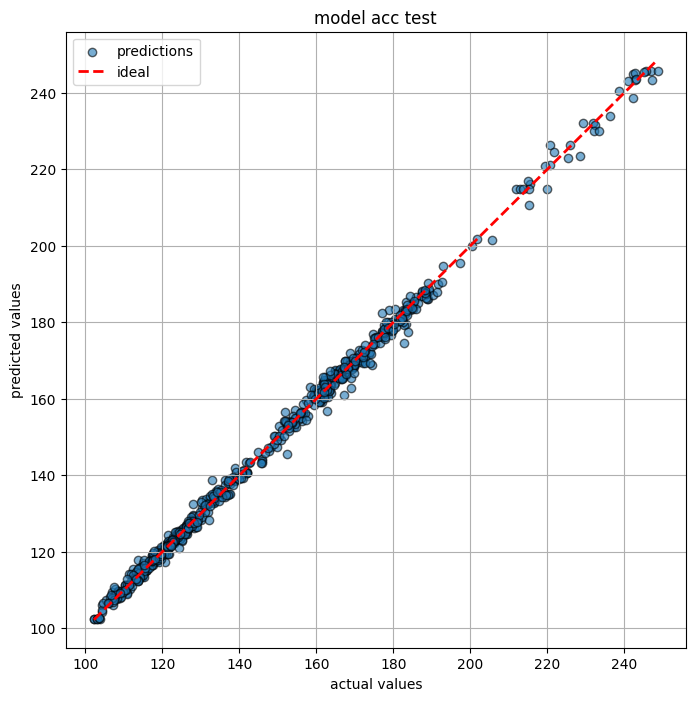

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_improved, alpha=0.6, edgecolor='k', label="predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="ideal")
plt.title("model acc test")
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.legend()
plt.grid(True)
plt.show()


По графику видно, что модель достаточно точно предсказывает стоимость золота

# Самостоятельная имплементация регрессии

Определим класс регрессора со всеми необходимыми функциями:

In [15]:
import numpy as np

class KNNRegressor:
    def __init__(self, n_neighbors=5, p=2):
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2) ** self.p, axis=1) ** (1 / self.p)

    def _predict_one(self, x):
        distances = self._distance(self.X_train, x)
        neighbor_indices = distances.argsort()[:self.n_neighbors]
        neighbor_values = self.y_train[neighbor_indices]
        return neighbor_values.mean()

    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])


Обучим модель на введенных ранее данных и посмотрим на полученные значения MSE и R^2 score. Число соседей оставим 5, метрика расстояния - Евклидово.

In [16]:
knn_model = KNNRegressor(n_neighbors=5, p=2)
knn_model.fit(X_train_scaled, y_train)

y_pred_custom = knn_model.predict(X_test_scaled)

custom_mse = mean_squared_error(y_test, y_pred_custom)
custom_r2 = r2_score(y_test, y_pred_custom)

print("custom MSE:", custom_mse)
print("custom R^2 score:", custom_r2)


custom MSE: 8.034904042055972
custom R^2 score: 0.9916745519648053


In [17]:
print("base MSE:", mse, "custom MSE:", custom_mse)
print("base R^2:", r2, "custom R^2:", custom_r2)


base MSE: 374.66330476754894 custom MSE: 8.034904042055972
base R^2: 0.6117887832623803 custom R^2: 0.9916745519648053


По метрикам видно, что кастомная модель работает лучше, чем базовая (MSE:
108.01814799999993 < 691.7266755000002)

Гипотеза - подберем оптимальные гиперпараметры, которые позволят улучшить точность модели. Выбирать будем из разных комбинаций метрик расстояния и числа соседей.

In [18]:
best_mse = float('inf')
best_params = None

for n_neighbors in [3, 5, 7, 9]:
    for p in [1, 2]:
        knn_model = KNNRegressor(n_neighbors=n_neighbors, p=p)
        knn_model.fit(X_train_scaled, y_train)
        y_pred_custom = knn_model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred_custom)
        if mse < best_mse:
            best_mse = mse
            best_params = {'n_neighbors': n_neighbors, 'p': p}

print("best params:", best_params)
print("best MSE:", best_mse)


best params: {'n_neighbors': 3, 'p': 1}
best MSE: 2.5824276678713773


Теперь обучим модель с новыми гиперпараметрами:

In [19]:
knn_model = KNNRegressor(n_neighbors=best_params['n_neighbors'], p=best_params['p'])
knn_model.fit(X_train_scaled, y_train)

y_pred_custom_improved = knn_model.predict(X_test_scaled)
improved_custom_mse = mean_squared_error(y_test, y_pred_custom_improved)
improved_custom_r2 = r2_score(y_test, y_pred_custom_improved)

print("improved custom MSE:",improved_custom_mse)
print("improved custom R^2 score:",improved_custom_r2)


improved custom MSE: 2.5824276678713773
improved custom R^2 score: 0.997324191148895


In [20]:
print("base MSE:", mse, ", improved base MSE:", mse_improved, ", improved custom MSE:", improved_custom_mse)
print("base R^2:", r2, ", improved base R^2:", r2_improved, ", improved custom R^2:", improved_custom_r2)


base MSE: 8.759830763060421 , improved base MSE: 2.528016890375344 , improved custom MSE: 2.5824276678713773
base R^2: 0.6117887832623803 , improved base R^2: 0.997380569432721 , improved custom R^2: 0.997324191148895


Библиотечная и кастомная реализации показывают одинаково хорошие результаты с минимальной разницей.
Построим график, чтобы наглядно сравнить кастомную реализацию с библиотечной

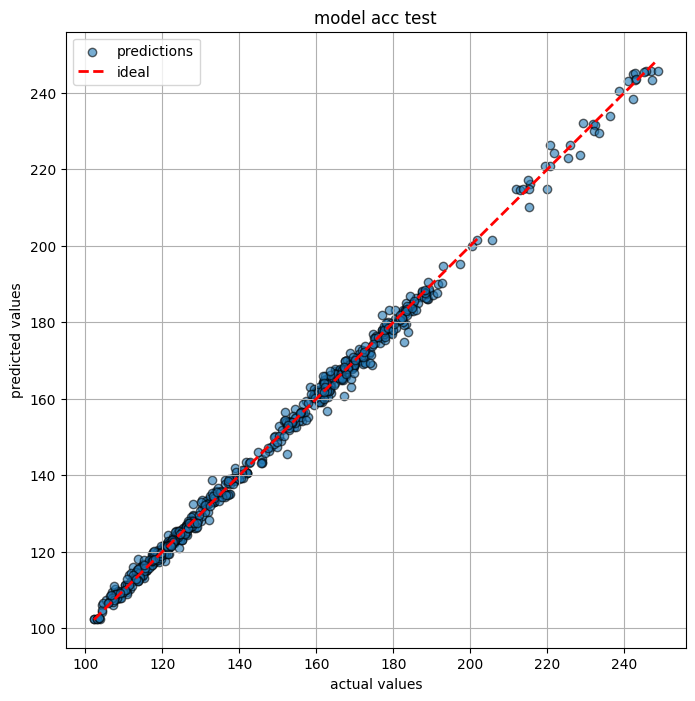

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_custom_improved, alpha=0.6, edgecolor='k', label="predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="ideal")
plt.title("model acc test")
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.legend()
plt.grid(True)
plt.show()

### Выводы:
- Улучшенная собственная модель KNN показывает лучшие результаты по сравнению с базовой по метрике MSE, однако проигрывает базовой по R^2
- Гиперпараметры (например, число соседей и выбранная метрика расстояния) значительно влияют на качество модели

Можно сделать вывод, что бейзлайн модель показывает все же более лучший результат (что подтверждается графиком выше)


# Самостоятельная имплементация классификации:

Перейдем к самостоятельной имплементации классификации. Импортируем данные из датасета:

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

file_path = "mushroom_cleaned.csv"
data = pd.read_csv(file_path)
data = data.sample(n=1000, random_state=42)


print(data.head())
print(data.info())


       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
14085           826          2                0          10     0.044195   
19006           571          6                2           4     0.536738   
50623          1122          2                0           0     0.450051   
41819           278          2                0           4     0.190566   
8085            735          2                6          10     1.455884   

       stem-width  stem-color    season  class  
14085        2433           6  1.804273      0  
19006         761           4  0.943195      1  
50623        1942          11  0.943195      0  
41819         576          11  0.943195      0  
8085         1077          11  0.888450      1  
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 14085 to 38937
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     1000 non-null   int64  
 1   

Преобразуем категориальные признаки, разделим выборки на обучающую и тестовую:

In [23]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

Определим кастомный классификатор

In [24]:
import numpy as np
from collections import Counter

class CustomKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]
            neighbor_labels = self.y_train[neighbor_indices]
            most_common = Counter(neighbor_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == np.array(y))
    def get_params(self, deep=True):
        return {'n_neighbors': self.n_neighbors}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self



Обучим кастомную модель, выведем результаты в консоль (будем ориентироваться на метрику accuracy)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = CustomKNNClassifier(5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6


Нормализация, поиск оптимальных параметров и обучение

In [26]:
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
#norm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#поиск оптималного числа соседей
param_grid = {'n_neighbors': [3,5,6,7]}
grid_search = GridSearchCV(CustomKNNClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("best neighbors:", best_params)
print("best score:", best_score)

#обучим улучшенную модель, чтобы посмотреть, как улучшится или не улучшится accuracy
knn_optimized = CustomKNNClassifier(n_neighbors=best_params['n_neighbors'])
knn_optimized.fit(X_train, y_train)
y_pred_optimized = knn_optimized.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print("optimized accuracy:", optimized_accuracy)

best neighbors: {'n_neighbors': 3}
best score: 0.8292929292929293
optimized accuracy: 0.7


Можно сделать вывод, что кастомный классификатор справляется хуже, чем бейзлайн. Это может быть связано с уменьшенным размером датасета (что было сделано исходя из hardware-ных ограничений).